# Implementation of experiments

## 1 Load libraries


In [62]:
## load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from modules.functions import center_data
from modules.visualization import plot_classfication
from modules.PCAClass import *
# scikit-learn training and split data
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# models classifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# metrics
from sklearn.metrics import accuracy_score

## 2. Load Data

In [63]:
# load data
path = 'homeworks/data/data_banknote_authentication.txt'
df = pd.read_csv(path, delimiter=',',header=None)
print(df.head())

         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0


### Select Features and Target 


In [64]:
## features, target and features names
feature_names = df.columns[:-1]
X_feature = df.iloc[:, :-1].values
y_target = df.iloc[:, -1].values

In [65]:
# center data according to the mean.
X_centered = center_data(X_feature)

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X_centered,y_target,test_size=0.5,random_state=0)

In [67]:
print('X_train shape:',X_train.shape,y_train.shape)

X_train shape: (686, 4) (686,)


## Experiments with Classifiers

### 5.1 1-NN Classifier

In [68]:
# Dimensionality reduction with PCA Implementation

array_accuracy_implementation=[]
array_accuracy_sklearn=[]

for i in range(1,len(feature_names)+1):
    print('PCA with',i,'components')
    objPca = PcaClass(X_train,y_train,i,feature_names)
    X_train_projected = objPca.fit()

    X_test_projected = objPca.transform(X_test)

    # 5 Experiments
    # 5.1 fit the model Naive Bayes Classifier
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')


    knn.fit(X_train_projected, y_train)

    y_pred = knn.predict(X_test_projected)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    array_accuracy_implementation.append(accuracy)

    # traditional PCA
    pca = PCA(n_components=i)

    # Conduct PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    # Fit the model
    knn.fit(X_train_pca, y_train)

    y_pred = knn.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)

    array_accuracy_sklearn.append(accuracy)


PCA with 1 components
PCA with 2 components
PCA with 3 components
PCA with 4 components


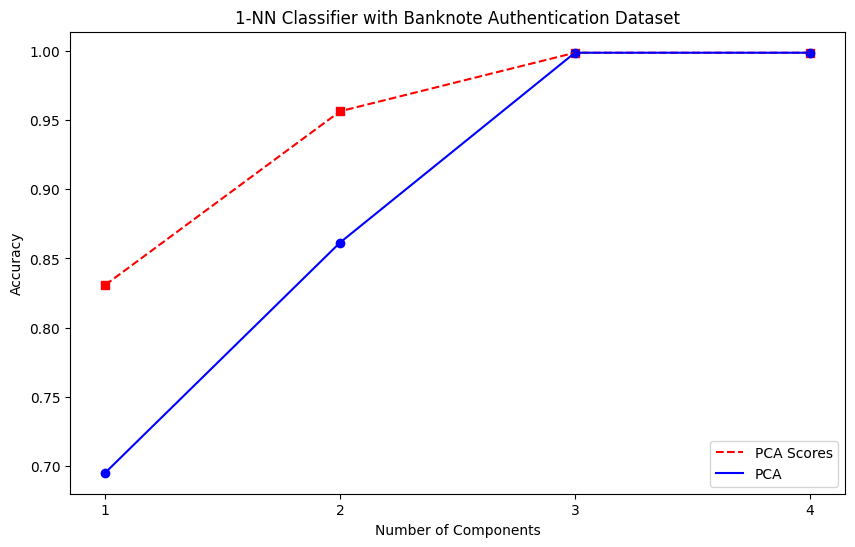

In [69]:
#setting visualization
xlabel='Number of Components'
ylabel='Accuracy'
title='1-NN Classifier with Banknote Authentication Dataset'
filename='1NN.png'
plot_classfication(array_accuracy_implementation,array_accuracy_sklearn,xlabel,ylabel,title,filename)

## 5.2 fit the model Naive Bayes Classifier

In [70]:
# Dimensionality reduction with PCA Implementation
print('PCA Implementation')
array_accuracy_implementation=[]
array_accuracy_sklearn=[]

for i in range(1,len(feature_names)+1):
    print('PCA with',i,'components')
    objPca = PcaClass(X_train,y_train,i,feature_names)
    X_train_projected = objPca.fit()

    X_test_projected = objPca.transform(X_test)

    # 5 Experiments
    # 5.2 fit the model Naive Bayes Classifier
    gnb = GaussianNB()

    gnb.fit(X_train_projected, y_train)

    y_pred = gnb.predict(X_test_projected)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    array_accuracy_implementation.append(accuracy)

    # traditional PCA
    pca = PCA(n_components=i)

    # Conduct PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    # Fit the model
    gnb.fit(X_train_pca, y_train)

    y_pred = gnb.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)

    array_accuracy_sklearn.append(accuracy)


PCA Implementation
PCA with 1 components
PCA with 2 components
PCA with 3 components
PCA with 4 components


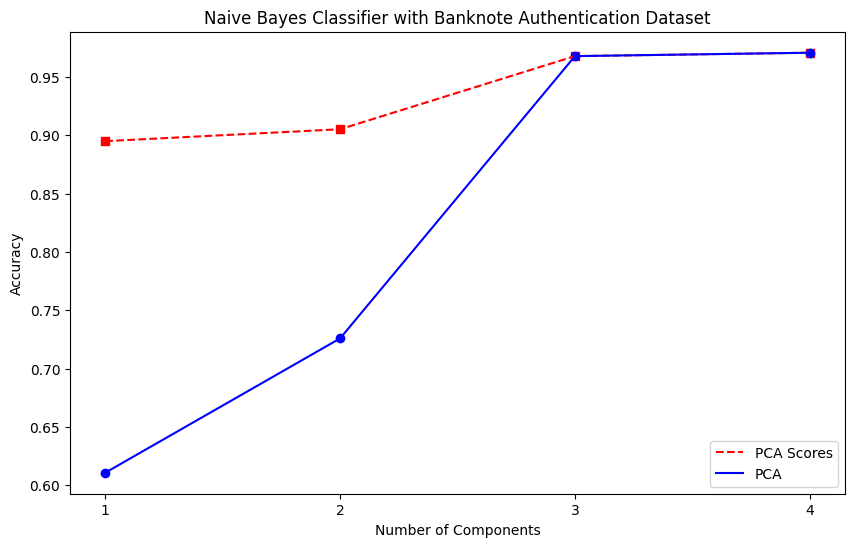

In [71]:
## Visualization
xlabel='Number of Components'
ylabel='Accuracy'
title='Naive Bayes Classifier with Banknote Authentication Dataset'
filename='naivebayes.png'
plot_classfication(array_accuracy_implementation,array_accuracy_sklearn,xlabel,ylabel,title,filename)

## 5.3 Desicion Tree Classifier


In [72]:
# Dimensionality reduction with PCA Implementation
print('PCA Implementation')
array_accuracy_implementation=[]
array_accuracy_sklearn=[]

for i in range(1,len(feature_names)+1):
    print('PCA with',i,'components')
    objPca = PcaClass(X_train,y_train,i,feature_names)
    X_train_projected = objPca.fit()

    X_test_projected = objPca.transform(X_test)

    # 5 Experiments
    # 5.3 fit the model  decision tree classifier
   
    clf = DecisionTreeClassifier(criterion='gini', min_samples_split=10)

    clf.fit(X_train_projected, y_train)

    y_pred = clf.predict(X_test_projected)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    array_accuracy_implementation.append(accuracy)

    # traditional PCA
    pca = PCA(n_components=i)

    # Conduct PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    # Fit the model
    clf.fit(X_train_pca, y_train)

    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)

    array_accuracy_sklearn.append(accuracy)

PCA Implementation
PCA with 1 components
PCA with 2 components
PCA with 3 components
PCA with 4 components


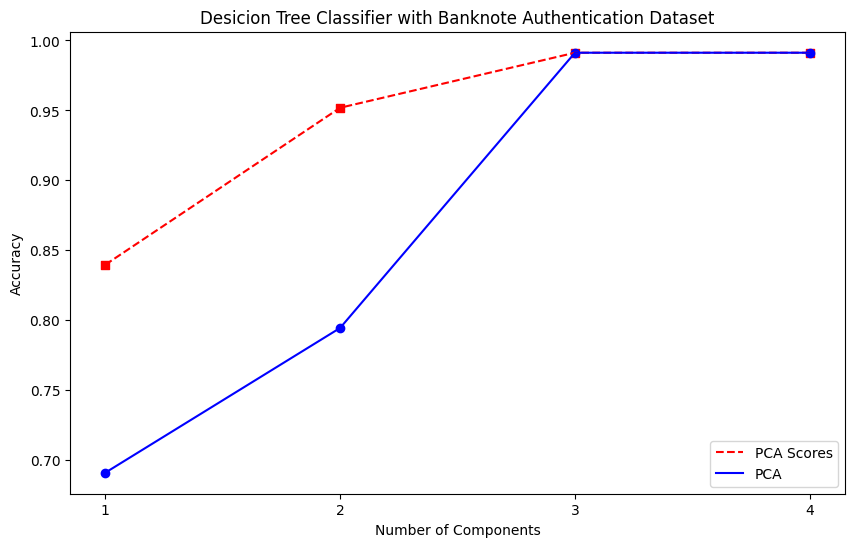

In [73]:
xlabel='Number of Components'
ylabel='Accuracy'
title='Desicion Tree Classifier with Banknote Authentication Dataset'
filename='decisiontree.png'
plot_classfication(array_accuracy_implementation,array_accuracy_sklearn,xlabel,ylabel,title,filename)

### Linear Discriminant

In [74]:
print('PCA Implementation')
array_accuracy_implementation=[]
array_accuracy_sklearn=[]

for i in range(1,len(feature_names)+1):
    print('PCA with',i,'components')
    objPca = PcaClass(X_train,y_train,i,feature_names)
    X_train_projected = objPca.fit()

    X_test_projected = objPca.transform(X_test)

    # 5 Experiments
    # 5.4 fit the model  LDA
   
    clf = LinearDiscriminantAnalysis()

    clf.fit(X_train_projected, y_train)

    y_pred = clf.predict(X_test_projected)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    array_accuracy_implementation.append(accuracy)

    # traditional PCA
    pca = PCA(n_components=i)

    # Conduct PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    # Fit the model
    clf.fit(X_train_pca, y_train)

    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)

    array_accuracy_sklearn.append(accuracy)

PCA Implementation
PCA with 1 components
PCA with 2 components
PCA with 3 components
PCA with 4 components


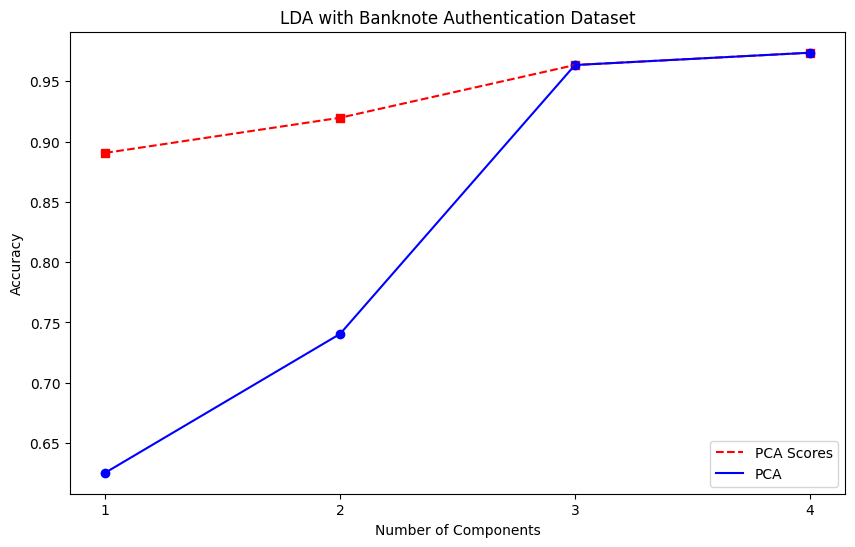

In [75]:
xlabel='Number of Components'
ylabel='Accuracy'
title='LDA with Banknote Authentication Dataset'
filename='lda.png'
plot_classfication(array_accuracy_implementation,array_accuracy_sklearn,xlabel,ylabel,title,filename)

## Second Experiments with Climate Database

In [76]:
## Preprocessing the data
# Load the data
# Initialize an empty list to hold the lines
lines = []

# Open the file
with open('homeworks/data/pop_failures.dat', 'r') as file:
    # Read each line
    for line in file:
        # Split the line into fields and add it to the list
        lines.append(line.split())

# Convert the list of lines into a DataFrame
df_climate = pd.DataFrame(lines[1:], columns=lines[0])



In [77]:
## Select Features and Target
feature_names = df_climate.columns[2:-1]
X_feature = df_climate.iloc[:, 2:-1].values.astype(float)
y_target = df_climate.iloc[:, -1].values.astype(int)

In [78]:
# Center the data
X_centered = center_data(X_feature)

In [79]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_centered,y_target,test_size=0.5,random_state=0)

In [80]:
print('X_train shape:',X_train.shape,y_train.shape)

X_train shape: (270, 18) (270,)


In [81]:
## Pipeline to training and evaluation of the models

# Define the classifiers to evaluate
classifiers = [
    ('KNN', KNeighborsClassifier(n_neighbors=1, metric='euclidean')),
    ('Naive Bayes',GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', min_samples_split=10)),
    ('LDA', LinearDiscriminantAnalysis())   
]

# Define the number of components to evaluate
n_components = range(1, len(feature_names)+1)
dictionary_pca = {}
dictionary_pca_scores = {}
# For each classifier
for classifier_name, classifier in classifiers:
    # For each number of components
    list_accuracy_pca = []
    list_accuracy_pca_scores = []
    for n in n_components:
        # -------Experiments with PCA Scores------- 
        # Create a pipeline pca scores + classifier
        objPca = PcaClass(X_train, y_train, n, feature_names)
        X_transformed = objPca.fit()
        X_test_projected = objPca.transform(X_test)

        classifier.fit(X_transformed, y_train)

        # Predict the labels of the test set
        y_pred = classifier.predict(X_test_projected)

        # Compute the accuracy
        accuracy = accuracy_score(y_test, y_pred)

        list_accuracy_pca_scores.append(accuracy)

        # ------- Experiments with PCA
        # Create a pipeline pca + classifier
        pipe = Pipeline(steps=[('PCA', PCA(n_components=n)), (classifier_name, classifier)])

        # Train the classifier
        pipe.fit(X_train, y_train)

        # Predict the labels of the test set
        y_pred = pipe.predict(X_test)

        # Compute the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        list_accuracy_pca.append(accuracy)
        #print(f'Accuracy of {classifier_name} with {n} PCA components: {accuracy}')
    dictionary_pca[classifier_name] = list_accuracy_pca
    dictionary_pca_scores[classifier_name] = list_accuracy_pca_scores
    

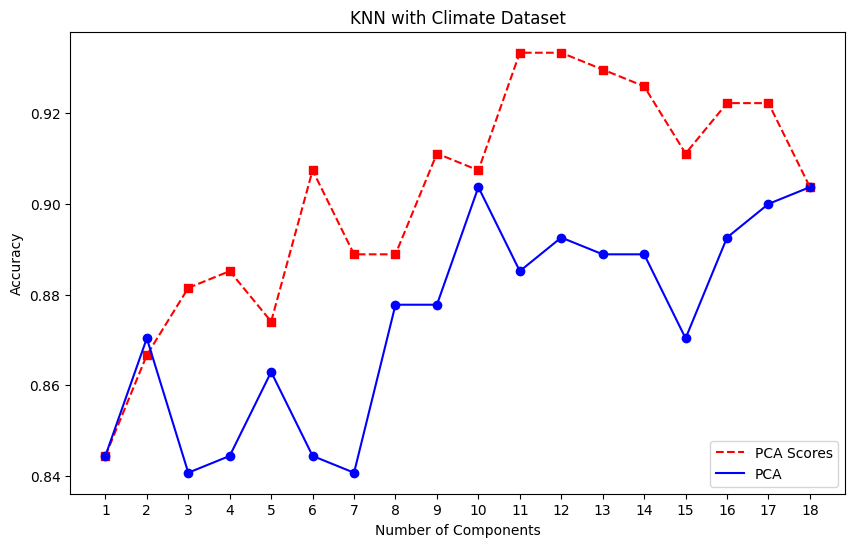

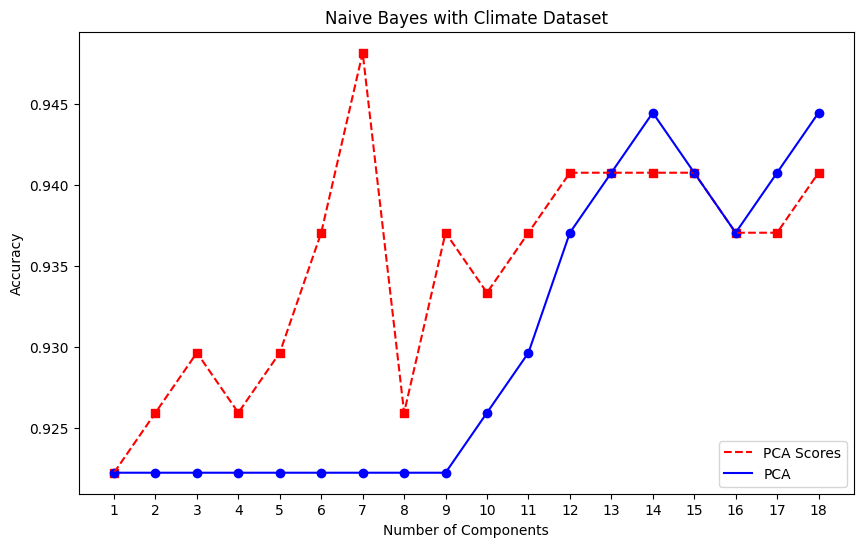

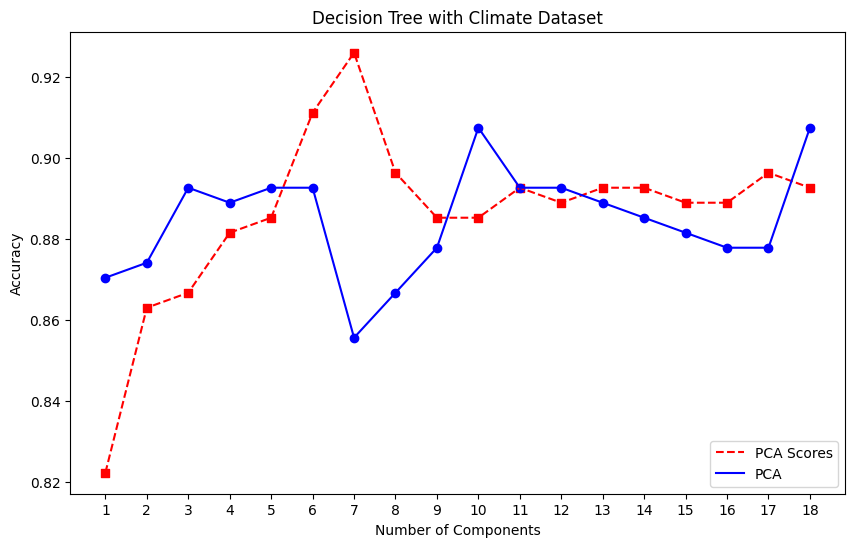

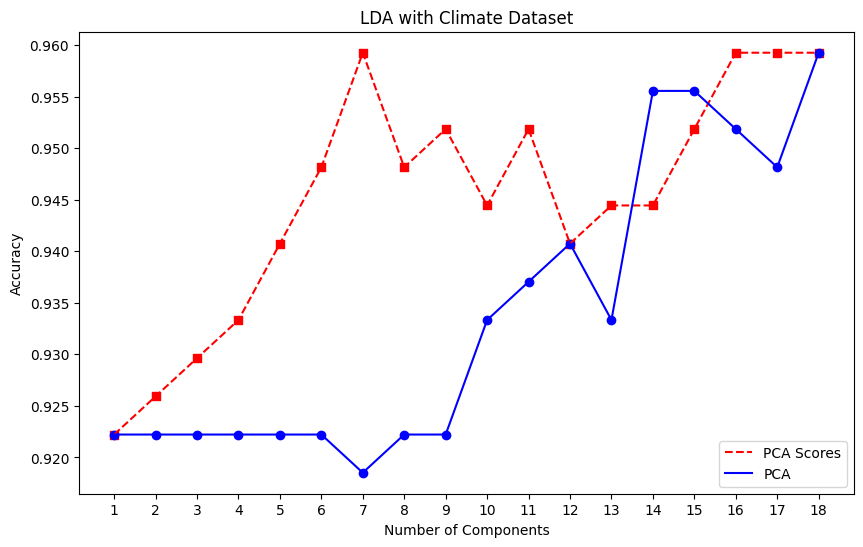

In [82]:
# Plot the results
xlabel='Number of Components'
ylabel='Accuracy'
for key,item in dictionary_pca.items():
    title=str(key) + ' with Climate Dataset'
    filename=str(key)+'_climate.png'
    array_accuracy_sklearn = item
    array_accuracy_implementation = dictionary_pca_scores[key] 
    plot_classfication(array_accuracy_implementation,array_accuracy_sklearn,xlabel,ylabel,title,filename)
    


